In [1]:
# import libraries and dependecies
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# read in csv files and place into dataframes
# Read in the transaction_fraud_data.csv file into a PandasDataFrame.

fraud_data = pd.read_csv("User0_credit_card_transactions.csv")

# Review the DataFrame
fraud_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [3]:
#Data cleanup

display(fraud_data.dtypes)

fraud_data['Amount'] = fraud_data['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)

label_encoder = LabelEncoder()
fraud_data['Use Chip'] = label_encoder.fit_transform(fraud_data['Use Chip'])
fraud_data['Errors?'] = label_encoder.fit_transform(fraud_data['Errors?'])
fraud_data['Is Fraud?'] = label_encoder.fit_transform(fraud_data['Is Fraud?'])

scaler = StandardScaler()
columns_to_scale = ['Year', 'Month', 'Day', 'Amount', 'Zip', 'MCC']
fraud_data[columns_to_scale] = scaler.fit_transform(fraud_data[columns_to_scale])

categorical_variables = list(fraud_data.dtypes[fraud_data.dtypes=="object"].index)

display(categorical_variables)

fraud_data.head()

User                int64
Card                int64
Year                int64
Month               int64
Day                 int64
Time               object
Amount             object
Use Chip           object
Merchant Name       int64
Merchant City      object
Merchant State     object
Zip               float64
MCC                 int64
Errors?            object
Is Fraud?          object
dtype: object

['Time', 'Merchant City', 'Merchant State']

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,-1.785239,0.699342,-1.675220,06:21,0.560661,2,3527213246127876953,La Verne,CA,0.214224,-0.449090,8,0
1,0,0,-1.785239,0.699342,-1.675220,06:42,-0.454774,2,-727612092139916043,Monterey Park,CA,0.214516,-0.292303,8,0
2,0,0,-1.785239,0.699342,-1.561599,06:22,0.414628,2,-727612092139916043,Monterey Park,CA,0.214516,-0.292303,8,0
3,0,0,-1.785239,0.699342,-1.561599,17:45,0.506071,2,3414527459579106770,Monterey Park,CA,0.214516,0.046697,8,0
4,0,0,-1.785239,0.699342,-1.447977,06:23,0.248628,2,5817218446178736267,La Verne,CA,0.214224,0.415359,8,0


In [4]:
enc = OneHotEncoder(sparse = False)

encoded_data = enc.fit_transform(fraud_data[categorical_variables])

encoded_fraud_data = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

display(encoded_fraud_data)

,Time_00:01,Time_00:03,Time_00:06,Time_00:07,Time_00:08,Time_00:09,Time_00:10,Time_00:11,Time_00:12,Time_00:14,...,Merchant State_Philippines,Merchant State_Portugal,Merchant State_SC,Merchant State_Switzerland,Merchant State_TX,Merchant State_UT,Merchant State_VA,Merchant State_WA,Merchant State_WI,Merchant State_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
extracted_col = fraud_data[["Amount", "Use Chip", "Is Fraud?", "Errors?"]]

display(extracted_col)

encoded_fraud_data = encoded_fraud_data.join(extracted_col)

encoded_fraud_data.head()

,Amount,Use Chip,Is Fraud?,Errors?
0,0.560661,2,0,8
1,-0.454774,2,0,8
2,0.414628,2,0,8
3,0.506071,2,0,8
4,0.248628,2,0,8
...,...,...,...,...
19958,-0.760328,2,0,7
19959,-0.566715,2,0,8
19960,-0.715084,2,0,8
19961,-0.711898,2,0,8


,Time_00:01,Time_00:03,Time_00:06,Time_00:07,Time_00:08,Time_00:09,Time_00:10,Time_00:11,Time_00:12,Time_00:14,...,Merchant State_TX,Merchant State_UT,Merchant State_VA,Merchant State_WA,Merchant State_WI,Merchant State_nan,Amount,Use Chip,Is Fraud?,Errors?
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.560661,2,0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.454774,2,0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.414628,2,0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.506071,2,0,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.248628,2,0,8


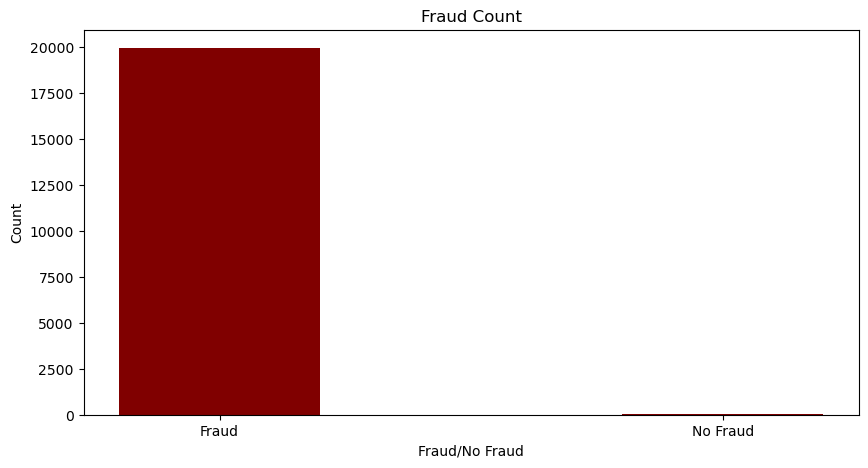

In [6]:
encoded_fraud_data['Is Fraud?'].value_counts()

# creating the dataset
x=['Fraud', 'No Fraud']
y=[19936, 27]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Fraud/No Fraud")
plt.ylabel("Count")
plt.title("Fraud Count")
plt.show()


In [7]:
# The target column should be the binary `Is Fraud` column.
y = encoded_fraud_data["Is Fraud?"]

X = encoded_fraud_data.drop(columns=["Is Fraud?"])

In [8]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=11000)
X_resampled, y_resampled = smote.fit_resample(X, y)
X.head()

,Time_00:01,Time_00:03,Time_00:06,Time_00:07,Time_00:08,Time_00:09,Time_00:10,Time_00:11,Time_00:12,Time_00:14,...,Merchant State_Switzerland,Merchant State_TX,Merchant State_UT,Merchant State_VA,Merchant State_WA,Merchant State_WI,Merchant State_nan,Amount,Use Chip,Errors?
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.560661,2,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.454774,2,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.414628,2,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506071,2,8
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248628,2,8


In [9]:
# Split the dataset using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#scaling model
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
# Declare a logistic regression model.
logistic_regression_model = LogisticRegression(random_state=28)

#fit and running model
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

C:\Users\kashb\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [11]:
#Generate training predictions
training_predictions = logistic_regression_model.predict(X_train_scaled)

# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Review the predictions

display(training_predictions)
display(testing_predictions)



array([0, 0, 0, ..., 0, 0, 0])

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, testing_predictions)

0.9983971148066519

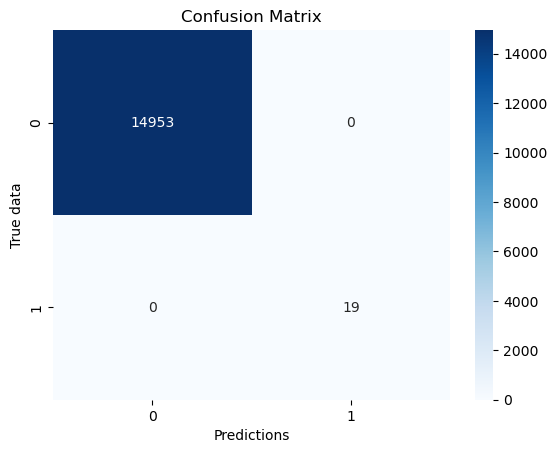

In [13]:
#displaying confusion matrix from predictions and true data

cm = confusion_matrix(y_train, training_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("True data")
plt.title("Confusion Matrix")
plt.show()

In [14]:
# Save a classification report
training_report = classification_report(y_train, training_predictions)
# Then view its output
print(training_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14953
           1       1.00      1.00      1.00        19

    accuracy                           1.00     14972
   macro avg       1.00      1.00      1.00     14972
weighted avg       1.00      1.00      1.00     14972



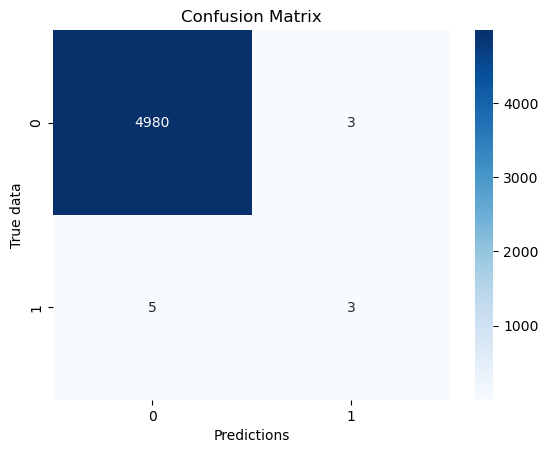

In [15]:
#displaying confusion matrix from predictions and true data

cm = confusion_matrix(y_test, testing_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predictions")
plt.ylabel("True data")
plt.title("Confusion Matrix")
plt.show()

In [16]:
# Save a classification report
testing_report = classification_report(y_test, testing_predictions)
# Then view its output
print(testing_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4983
           1       0.50      0.38      0.43         8

    accuracy                           1.00      4991
   macro avg       0.75      0.69      0.71      4991
weighted avg       1.00      1.00      1.00      4991

